## Stockmarket sentiment

In [ ]:
# loading Data and get a quick overview

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\noahw\OneDrive\Desktop\machinelearning\stock_data.csv")


print(df)

                                                   Text  Sentiment
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2     user I'd be afraid to short AMZN - they are lo...          1
3                                     MNTA Over 12.00            1
4                                      OI  Over 21.37            1
...                                                 ...        ...
5786  Industry body CII said #discoms are likely to ...         -1
5787  #Gold prices slip below Rs 46,000 as #investor...         -1
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1
5790  #Sensex, #Nifty climb off day's highs, still u...          1

[5791 rows x 2 columns]


In [2]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [3]:
print(df.shape)

print(df.shape)

(5791, 2)
(5791, 2)


In [4]:
df.head().style

,Text,Sentiment
0,"Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 or method 2, see prev posts",1
1,user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year. AWESOME.,1
2,user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
# Cleaning the text

In [5]:

import spacy
nlp=spacy.load('en_core_web_md')

In [6]:

import inflect
inflect = inflect.engine()

word = "bars"

word='bananas'
print("The plural of ", word, " is ", inflect.plural(word))
print("Is Word plural? ", word, " is ", inflect.singular_noun(word))

The plural of  bananas  is  banana
Is Word plural?  bananas  is  banana


In [7]:
df['cleaned_text']=''


d=0
c=''
for x in df['Text']:
    
    #step 1 do the tokenization
    tokenized_text = nlp(str(x).lstrip().rstrip())
    for token in tokenized_text:

        #step 1
        #use the part of speach tagging
        #only nouns should be singularized 
        if (token.tag_ == "NN" or token.tag_ == "NE"):
            
            
            #check if the noun is already ingular
            #if so nothing will happen
            if inflect.singular_noun(str(token)) == False:
                c+=" "+str(token)
            else:  
                
                #step 2
                #singularize a plural noun
                singularized_text = inflect.plural(str(token))
                c+=" "+singularized_text
        else:
            #step 3
            #if token is verb do lemmatization
            if token.pos_ == "VERB" or token.pos_ == "AUX":

                #do lemmatization also for verb 
                c+=" "+str(token.lemma_)
            else:
                #step 4 & 5
                #remove token that are recognized as punctuation or stopwords
                if token.is_punct == True or token.is_stop == True:
                    pass

                else:
                    c+=" "+str(token)               
            
    
    #store the results in the new table
    df['cleaned_text'].iloc[d]=c
    c=''
    d+=1
    
df.head(10).style

c:\users\noahw\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Text,Sentiment,cleaned_text
0,"Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 or method 2, see prev posts",1,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 method 2 see prev posts
1,user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year. AWESOME.,1,user AAP MOVIE 55 % return FEA GEED indicator 15 trades year AWESOME
2,user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service,1,user 'd be afraid short AMZN be look like near monopoly eBooks infrastructure service
3,MNTA Over 12.00,1,MNTA 12.00
4,OI Over 21.37,1,OI 21.37
5,PGNX Over 3.04,1,PGNX 3.04
6,AAP - user if so then the current downtrend will break. Otherwise just a short-term correction in med-term downtrend.,-1,AAP user current downtrend will break short term correction med term downtrend
7,Monday's relative weakness. NYX WIN TIE TAP ICE INT BMC AON C CHK BIIB,-1,Monday relative weaknesses NYX WIN TIE TAP ICE INT BMC AON C CHK BIIB
8,GOOG - ower trend line channel test & volume support.,1,GOOG ower trend line channel test volume support
9,AAP will watch tomorrow for ONG entry.,1,AAP will watch tomorrow ONG entry


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Sentiment'])

df['type_encoded'] = encoder.transform(df['Sentiment'])
df.head(20)

,Text,Sentiment,cleaned_text,type_encoded
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 % return FEA GEED indicator...,1
2,user I'd be afraid to short AMZN - they are lo...,1,user 'd be afraid short AMZN be look like nea...,1
3,MNTA Over 12.00,1,MNTA 12.00,1
4,OI Over 21.37,1,OI 21.37,1
5,PGNX Over 3.04,1,PGNX 3.04,1
6,AAP - user if so then the current downtrend wi...,-1,AAP user current downtrend will break short t...,0
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1,Monday relative weaknesses NYX WIN TIE TAP IC...,0
8,GOOG - ower trend line channel test & volume s...,1,GOOG ower trend line channel test volume support,1
9,AAP will watch tomorrow for ONG entry.,1,AAP will watch tomorrow ONG entry,1


### Basic Analysis

Number of positive posts: 3685
Number of negative posts: 2106


<AxesSubplot:>

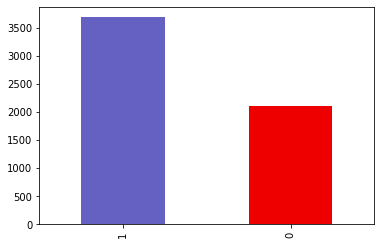

In [9]:
import matplotlib.pyplot as plt



print("Number of positive posts: {}\nNumber of negative posts: {}".format(df['type_encoded'].value_counts()[1],df['type_encoded'].value_counts()[0]))
df['type_encoded'].value_counts().plot.bar(color=['#6461c2', '#ee0000'])

In [10]:

df['length'] = df['Text'].apply(lambda x: len(x.split(' ')))
df.head()

,Text,Sentiment,cleaned_text,type_encoded,length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ...,1,21
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 % return FEA GEED indicator...,1,19
2,user I'd be afraid to short AMZN - they are lo...,1,user 'd be afraid short AMZN be look like nea...,1,18
3,MNTA Over 12.00,1,MNTA 12.00,1,5
4,OI Over 21.37,1,OI 21.37,1,6


Text(0.5, 0, 'Message Length')

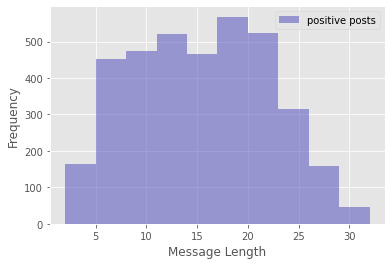

In [11]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(6, 4))

df[df.type_encoded==1].length.plot(
    kind='hist', color='#6461c2',
    label='positive posts', alpha=0.6)
#df[df.label=='FAKE'].length.plot(
#    kind='hist', color='#ee0000', 
#    label='Fake New', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")

Text(0.5, 0, 'Message Length')

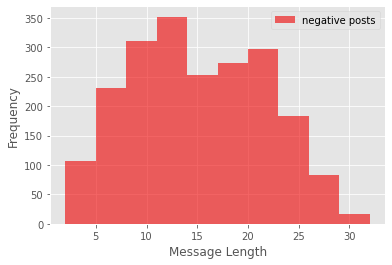

In [12]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(6, 4))

#df[df.label=='REAL'].length.plot(
#    kind='hist', color='#6461c2',
#    label='Real News', alpha=0.6)
df[df.type_encoded==0].length.plot(
    kind='hist', color='#ee0000', 
    label='negative posts', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")

### N-Gram

In [13]:
#n grams are a combinations of n words in our specific case
#below you can see the possible cominations of 2 words (without changing the ordering of the words)

from nltk import ngrams
sentence = 'this is a foo bar sentences and i '

n = 2
sevengrams = ngrams(sentence.split(), n)

for grams in sevengrams:
    print(grams)

('this', 'is')
('is', 'a')
('a', 'foo')
('foo', 'bar')
('bar', 'sentences')
('sentences', 'and')
('and', 'i')


In [17]:
def create_ngrams(input_text):
    #onegrams = input_list
    bigrams = [" ".join(t) for t in list(zip(input_text, input_text[1:]))]
    trigrams = [" ".join(t) for t in list(zip(input_text, input_text[1:], input_text[2:]))]
    return bigrams + trigrams


df["grams"] = df["cleaned_text"].apply(lambda x:create_ngrams(x.split()))
df[["grams"]].head()

,grams
0,"[Kickers watchlist, watchlist XIDE, XIDE TIT, ..."
1,"[user AAP, AAP MOVIE, MOVIE 55, 55 %, % return..."
2,"[user 'd, 'd be, be afraid, afraid short, shor..."
3,[MNTA 12.00]
4,[OI 21.37]


In [19]:
#seeing the most common 2 or 3 word comibnations in negative posts
import collections
def count_words(input_text):
    cnt = collections.Counter()
    for row in input_text:
        for word in row:
            cnt[word] += 1
    return cnt

count_words(df[(df.type_encoded == 0)]["grams"]).most_common(10)

[('Weekly Triangle', 48),
 ('Green Weekly', 45),
 ('™ s', 41),
 ('Green Weekly Triangle', 38),
 ('user AAP', 31),
 ('will be', 30),
 ('be short', 30),
 ('Amid Coronavirus', 25),
 ('Sensex Nifty', 22),
 ('look like', 20)]

In [20]:
#seeing the most common 2 or 3 word comibnations in positive posts
import collections
def count_words(input_text):
    cnt = collections.Counter()
    for row in input_text:
        for word in row:
            cnt[word] += 1
    return cnt

count_words(df[(df.type_encoded == 1)]["grams"]).most_common(10)

[('user AAP', 80),
 ('watch list', 66),
 ('AAP be', 43),
 ('will be', 39),
 ('look good', 39),
 ('have be', 39),
 ('look like', 38),
 ('™ s', 35),
 ('be go', 32),
 ('new highs', 30)]

### Naive Bayes

In [21]:
# creating the feature matrix 
#define x and y axis of the matrix we build later
X = df['cleaned_text']
Y = df['type_encoded']
print(len(X), len(Y))

from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(X).toarray()


# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X)

5791 5791
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
# load a Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# predict the class
Y_pred = classifier.predict(X_test)

# get the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

print(accuracy)

0.5962036238136325


## Deep Learning

In [14]:
#importing the necessary data

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Sentiment'])

df['type_encoded'] = encoder.transform(df['Sentiment'])
df.head()

,Text,Sentiment,cleaned_text,type_encoded,length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ...,1,21
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 % return FEA GEED indicator...,1,19
2,user I'd be afraid to short AMZN - they are lo...,1,user 'd be afraid short AMZN be look like nea...,1,18
3,MNTA Over 12.00,1,MNTA 12.00,1,5
4,OI Over 21.37,1,OI 21.37,1,6


In [16]:
#define x and y axis of the matrix we build later
X = df['cleaned_text']
Y = df['type_encoded']
print(len(X), len(Y))

Y = encoder.fit_transform(Y)
Y = Y.reshape(-1,1)

#split into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20)

#initialize vectorization
max_words = 10000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

5791 5791


### LSTM Model

In [24]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words, 50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [25]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 50)           500000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [29]:
training_data = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=7, validation_split=0.2)

Epoch 1/7
29/29 [==============================] - 18s 569ms/step - loss: 0.2324 - accuracy: 0.6309 - val_loss: 0.2277 - val_accuracy: 0.6502
Epoch 2/7
29/29 [==============================] - 21s 731ms/step - loss: 0.2322 - accuracy: 0.6319 - val_loss: 0.2286 - val_accuracy: 0.6498
Epoch 3/7
29/29 [==============================] - 23s 798ms/step - loss: 0.2321 - accuracy: 0.6330 - val_loss: 0.2283 - val_accuracy: 0.6495
Epoch 4/7
29/29 [==============================] - 23s 795ms/step - loss: 0.2317 - accuracy: 0.6342 - val_loss: 0.2278 - val_accuracy: 0.6493
Epoch 5/7
29/29 [==============================] - 23s 801ms/step - loss: 0.2316 - accuracy: 0.6354 - val_loss: 0.2282 - val_accuracy: 0.6486
Epoch 6/7
29/29 [==============================] - 23s 810ms/step - loss: 0.2306 - accuracy: 0.6373 - val_loss: 0.2323 - val_accuracy: 0.6478
Epoch 7/7
29/29 [==============================] - 23s 813ms/step - loss: 0.2304 - accuracy: 0.6383 - val_loss: 0.2321 - val_accuracy: 0.6477


In [30]:

import matplotlib.pyplot as plt

def plot_training(training_data,train,validation):
    plt.style.use('ggplot')
    plt.plot(training_data.history[train], color='#6461c2')
    plt.plot(training_data.history[validation], color='#ee0000')
    plt.title('Learning Progress')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

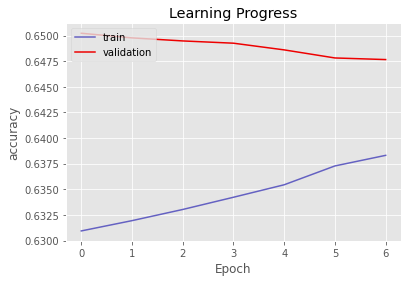

In [31]:
plot_training(training_data, 'accuracy', 'val_accuracy')

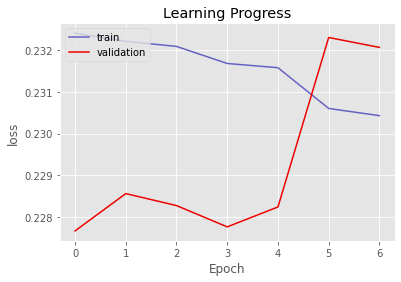

In [32]:
plot_training(training_data, 'loss', 'val_loss')

### Sequential - GRU

In [23]:
from tensorflow.keras.layers import GRU

def Sequential():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words, 50,input_length=max_len)(inputs)
    layer = GRU(256, return_sequences=True)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    
    model = Model(inputs=inputs,outputs=layer)
    return model

In [24]:
model = Sequential()
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 50)           500000    
_________________________________________________________________
gru (GRU)                    (None, 200, 256)          236544    
_________________________________________________________________
out_layer (Dense)            (None, 200, 1)            257       
_________________________________________________________________
activation (Activation)      (None, 200, 1)            0         
Total params: 736,801
Trainable params: 736,801
Non-trainable params: 0
_________________________________________________________________


In [25]:

training_data = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=7, validation_split=0.2)

Epoch 1/7
29/29 [==============================] - 20s 576ms/step - loss: 0.2353 - accuracy: 0.6300 - val_loss: 0.2293 - val_accuracy: 0.6505
Epoch 2/7
29/29 [==============================] - 17s 573ms/step - loss: 0.2337 - accuracy: 0.6302 - val_loss: 0.2289 - val_accuracy: 0.6505
Epoch 3/7
29/29 [==============================] - 17s 596ms/step - loss: 0.2333 - accuracy: 0.6302 - val_loss: 0.2288 - val_accuracy: 0.6505
Epoch 4/7
29/29 [==============================] - 19s 662ms/step - loss: 0.2329 - accuracy: 0.6302 - val_loss: 0.2309 - val_accuracy: 0.6505
Epoch 5/7
29/29 [==============================] - 21s 746ms/step - loss: 0.2342 - accuracy: 0.6302 - val_loss: 0.2274 - val_accuracy: 0.6505
Epoch 6/7
29/29 [==============================] - 24s 841ms/step - loss: 0.2327 - accuracy: 0.6303 - val_loss: 0.2289 - val_accuracy: 0.6505
Epoch 7/7
29/29 [==============================] - 24s 815ms/step - loss: 0.2328 - accuracy: 0.6304 - val_loss: 0.2277 - val_accuracy: 0.6504


In [26]:
import matplotlib.pyplot as plt

def plot_training(training_data,train,validation):
    plt.style.use('ggplot')
    plt.plot(training_data.history[train], color='#6461c2')
    plt.plot(training_data.history[validation], color='#ee0000')
    plt.title('Learning Progress')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

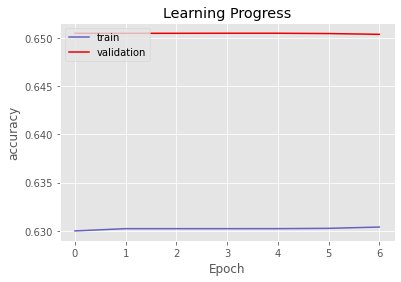

In [27]:
plot_training(training_data, 'accuracy', 'val_accuracy')

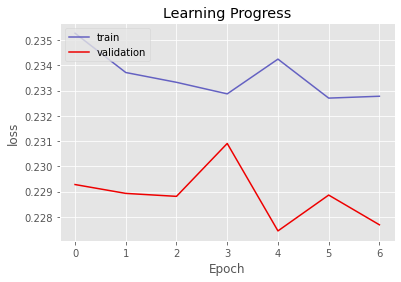

In [28]:
plot_training(training_data, 'loss', 'val_loss')